In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\Housing.csv")  

In [26]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


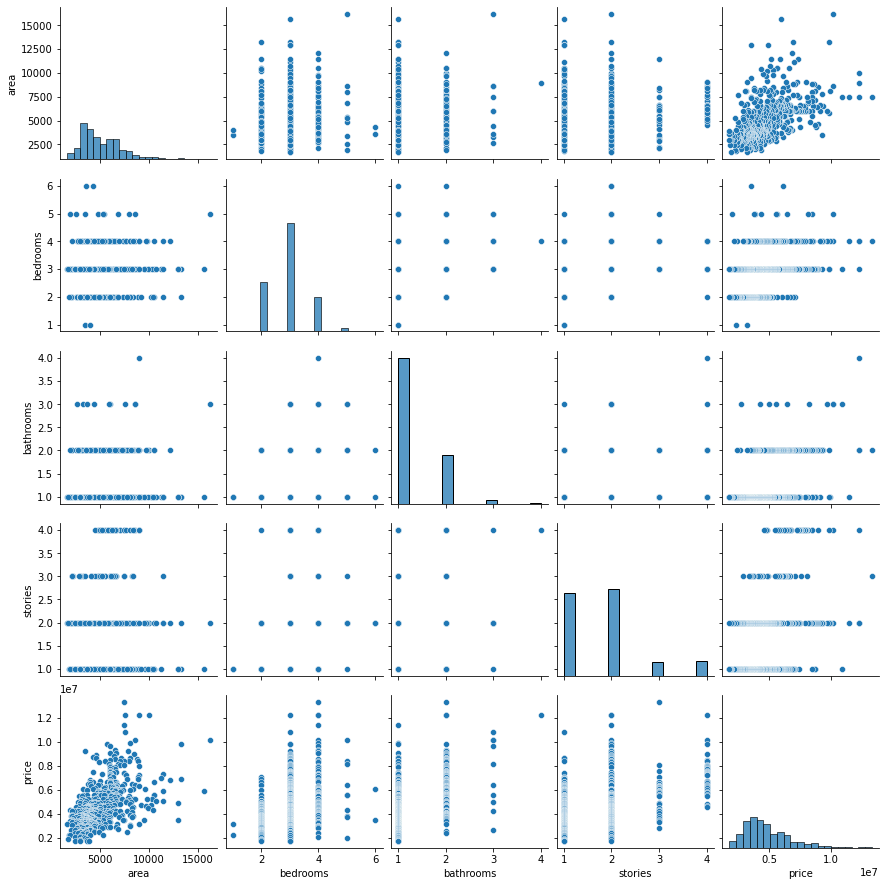

In [27]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(data, vars=['area', 'bedrooms', 'bathrooms', 'stories', 'price'])
plt.show()

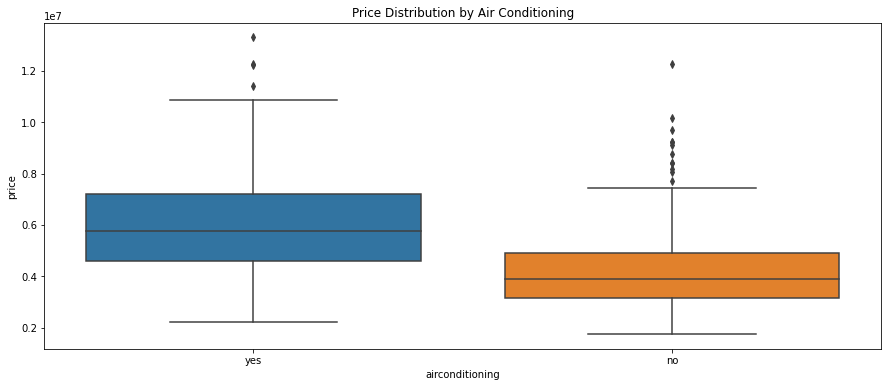

In [28]:
# Boxplot to visualize the distribution of 'price' by 'airconditioning' status
plt.figure(figsize=(15,6))
sns.boxplot(x='airconditioning', y='price', data=data)
plt.title('Price Distribution by Air Conditioning')
plt.show()

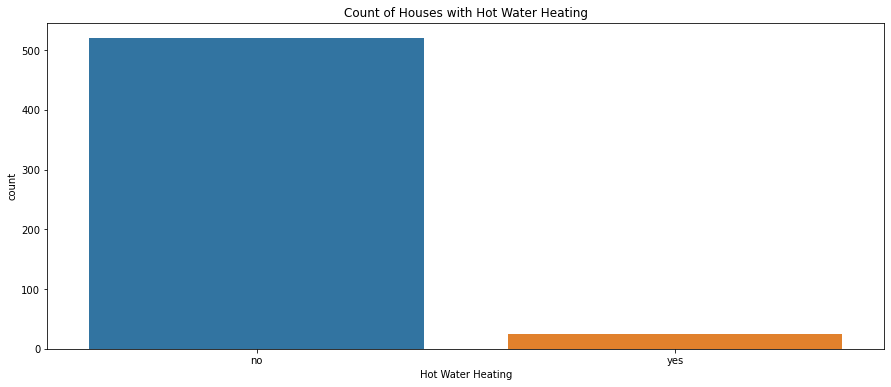

In [29]:
# Countplot to visualize the count of houses with/without 'hotwaterheating'
plt.figure(figsize=(15,6))
sns.countplot(x='hotwaterheating', data=data)
plt.title('Count of Houses with Hot Water Heating')
plt.xlabel('Hot Water Heating')
plt.show()

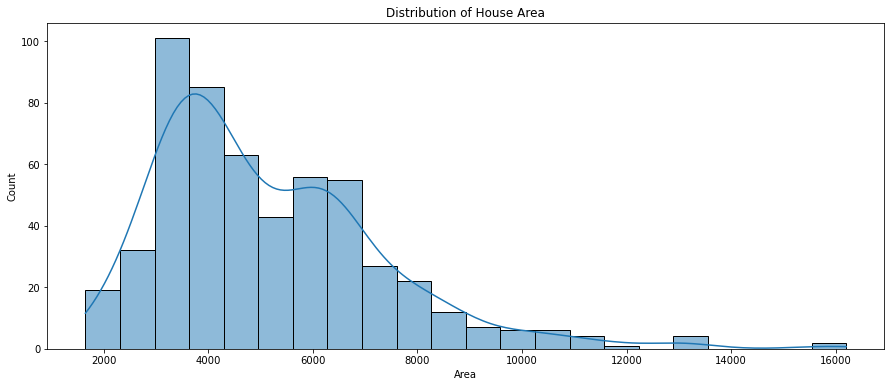

In [30]:
# Histogram of 'area'
plt.figure(figsize=(15,6))
sns.histplot(data['area'], kde=True)
plt.title('Distribution of House Area')
plt.xlabel('Area')
plt.show()

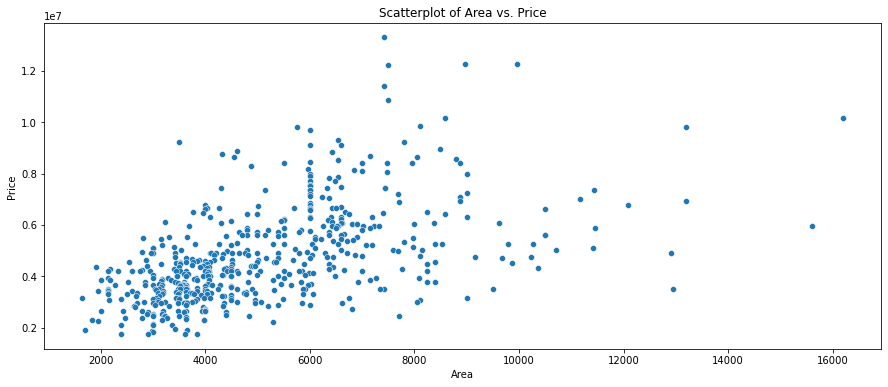

In [31]:
# Scatterplot of 'area' vs. 'price'
plt.figure(figsize=(15,6))
sns.scatterplot(x='area', y='price', data=data)
plt.title('Scatterplot of Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


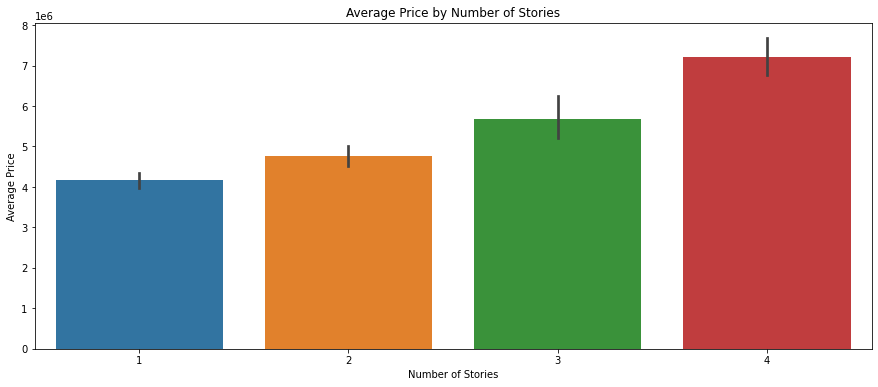

In [32]:
# Barplot to visualize the average 'price' by the number of 'stories'
plt.figure(figsize=(15,6))
sns.barplot(x='stories', y='price', data=data)
plt.title('Average Price by Number of Stories')
plt.xlabel('Number of Stories')
plt.ylabel('Average Price')
plt.show()


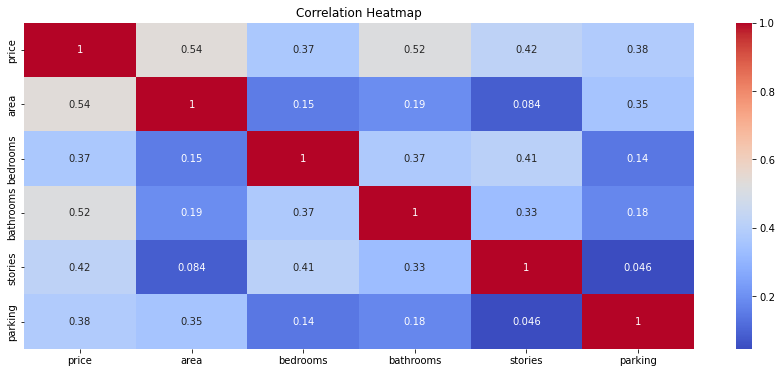

In [33]:
# Heatmap to visualize the correlation between numerical features
plt.figure(figsize=(15,6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [61]:
X = data[['area']]  # Replace with actual features
y = data['price']  # Target variable
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [62]:
# Define a mapping of values to be replaced
replace_map = {
    'yes': 1,
    'no': 0
}

# Specify the columns you want to replace values in
columns_to_replace = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Use the replace method to replace values in the specified columns
data[columns_to_replace] = data[columns_to_replace].replace(replace_map)


In [63]:
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(X_test)

In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 3675286604768.185
R-squared: 0.27287851871974644


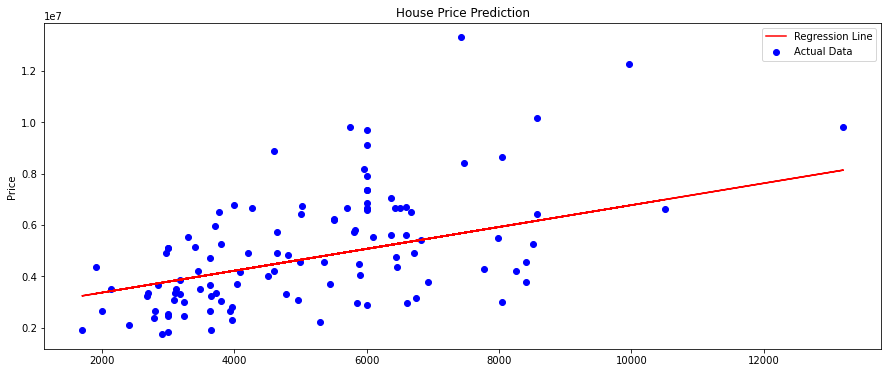

In [70]:
plt.figure(figsize=(15,6))
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Data')
plt.plot(X_test['area'], y_pred, color='red', label='Regression Line')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()

# BHARAT INTERN

# THANKYOU